## Incremental Model Improvement With Filters And Masks

And now begins the work of data scientist. We have established a benchmark model. We should now begin to refine upon this model seeking to continually improve the benchmark performance that we have. We can do this by using exploratory data analysis to study the features, especially as they relate to the target. If we find a feature that we believe exhibits some pattern of correspondence to our target we can use this to refine our model.

#### load the dataset using `read.csv()`

Load the csv file `titanic-updated.csv` into a dataframe called `titanic`.

In [34]:
# Write your code here.
titanic= read.csv("titanic-updated.csv", row.names="X")
attach(titanic)

The following objects are masked from titanic (pos = 4):

    Age, Cabin, Embarked, Fare, Parch, Pclass, Sex, SibSp, Survived,
    Ticket



In [35]:
stopifnot(dim(titanic) == c(891,10))

#### store the number of passengers

Store the number of passengers as the variable `number_of_passengers`.

In [3]:
# Write your code here.
number_of_passengers=length(Sex)
number_of_passengers

[1] 891

In [4]:
### HIDDEN TEST

For this project, we are going to think of our model as simply the values stored in a vector of predictions. For example, we already have one model, a model called `no_survivors`, which is simply a vector of zeros. To improve upon this model we will use a mask to reduce the number of values we are looking at and then replace these values with a 1. 

In [5]:
no_survivors <- rep(0, number_of_passengers)

### Randomized Model Improvement

What if we try to improve our model by simply randomly replacing zeros with one? We can do this using the `sample()` function

#### create a random mask

In [6]:
random_mask = sample(c(TRUE,FALSE), number_of_passengers, replace = TRUE)
random_mask[1:10]

[1]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE

#### FREE RESPONSE

Describe what the `sample()` function does.

In [ ]:
sample takes a sample of the specified size from the elements of x using either with or without replacement.

YOUR ANSWER HERE

#### FREE RESPONSE

Describe the vector `random_mask`

YOUR ANSWER HERE

#### duplicate and filter to create random model

Next, we use the vector `random_mask` to create a new model, `random_model`. 

First, we use the `rep` function to duplicate the vector `no_survivors`.

In [7]:
random_model = rep(no_survivors)

Then, we use the vector `random_mask` to assign a value of 1 to `random_model` everywhere `random_mask` is `TRUE`.

In [8]:
random_model[random_mask] = 1

#### define accuracy metric

Write a function called  `accuracy`. This function should takes two vectors as argument: 

1. a vector of actual values
1. a vector of predicted values 

The function should do two things:

1. it should use `verify_length` to make sure that the vectors have the same length.
1. it computes the accuracy of a prediction vector where accuracy is defined by

$$\text{accuracy} = \sum \left(\text{class}_{actual} = \text{class}_{predicted}\right)$$

In [9]:
verify_length <- function (v1, v2 ){
    if (length(v1) != length(v2)) {
        stop('length of vectors do not match') 
    }
}

accuracy <- function (actual, predicted) {verify_length(actual, predicted)
                                          sum(actual == predicted)/length(actual)
    # Write your code here.
    
}

#### assess accuracy of random model

In [10]:
accuracy(titanic$Survived, random_model)

[1] 0.4949495

As suspected, simply guessing is not better than guessing all zeros. It looks like we might actually justify our exorbitant salaries after all.

#### Use Proportion Tables To Look At Survival By Feature

Previously, we use a proportion table to look at a single feature, `Survived`. Next, We will use a proportion table to look at how two features interact with each other. Let's look at the structure of the dataframe again to remind ourselves which features we have available to us.

#### display the structure of the dataframe

In [11]:
str(titanic)

'data.frame':	891 obs. of  10 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket  : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin   : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


First, we look at the proportions of `Pclass` and `Survived`. There are three different ways we can look at a proportion table. 

1. The values of each combination as a proportion of the whole
1. The values in each row as a proportion of that row
1. The values in each column as a proportion of that column

#### whole proportions of `Pclass` versus `Survived`

Here, the entire table sums to 1.

In [12]:
prop.table(table(titanic$Pclass, titanic$Survived))

   
             0          1
  1 0.08978676 0.15263749
  2 0.10886644 0.09764310
  3 0.41750842 0.13355780

#### proportions of `Pclass` versus `Survived` by row

Here, each row sums to 1.

In [13]:
prop.table(table(titanic$Pclass, titanic$Survived), 1)

   
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

####  proportions of `Pclass` versus `Survived` by column 

Here, each column sums to 1.

In [14]:
prop.table(table(titanic$Pclass, titanic$Survived), 2)

   
            0         1
  1 0.1457195 0.3976608
  2 0.1766849 0.2543860
  3 0.6775956 0.3479532

#### whole proportions of `Sex` versus `Survived`

Define a variable `whole_prop_table_sex_versus_survived` that is a whole table proportion table of `Sex` versus `Survived.

In [15]:
# Write your code here.
whole_table_prop_table_sex_versus_survived= prop.table(table(titanic$Sex, titanic$Survived))

In [16]:
whole_table_prop_table_sex_versus_survived
stopifnot(round(as.vector(whole_table_prop_table_sex_versus_survived) ,2) == c(0.09, 0.53, 0.26, 0.12))

        
                  0          1
  female 0.09090909 0.26150393
  male   0.52525253 0.12233446

#### proportions of `Sex` versus `Survived` by row

Define a variable `row_prop_table_sex_versus_survived` that is a row proportion table of `Sex` versus `Survived.

In [17]:
# Write your code here.
row_prop_table_sex_versus_survived= prop.table(table(titanic$Sex, titanic$Survived),1)

In [18]:
row_prop_table_sex_versus_survived
stopifnot(round(as.vector(row_prop_table_sex_versus_survived) ,2) == c(0.26, 0.81, 0.74, 0.19))

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

####  proportions of `Sex` versus `Survived` by column 

Define a variable `column_prop_table_sex_versus_survived` that is a column proportion table of `Sex` versus `Survived.

In [19]:
# Write your code here.
column_prop_table_sex_versus_survived=prop.table(table(titanic$Sex, titanic$Survived),2)

In [20]:
column_prop_table_sex_versus_survived
stopifnot(round(as.vector(column_prop_table_sex_versus_survived) ,2) == c(0.15, 0.85, 0.68, 0.32))

        
                 0         1
  female 0.1475410 0.6812865
  male   0.8524590 0.3187135

#### FREE RESPONSE: Analyze Proportion Tables

Using the results obtained about prepare an analysis of How these two features can be used to predict whether or not someone survived the sinking of the Titanic.

YOUR ANSWER HERE

### Targeted Model Improvement

We saw that randomly selecting values to be replaced by one did not improve our model. What if we use some more intelligent way to select values that should be replaced by a one in our vector of predictions? We just looked at two features and identified some patterns that showed it would be more likely to have survived the sinking of the ship. Based upon this work we might decide that it would be a better model to replace the prediction for all female passengers with a 1. We can do that using masks and filters.

#### create a mask of just women

Create a vector mask, `women_mask` which contains the boolean values associated with whether or not the value of the `Sex` column is the string `'female'`.

In [21]:
# Write your code here.
women_mask= Sex == 'female'

In [22]:
stopifnot(women_mask[1:10] == c(FALSE, TRUE, TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE))

#### duplicate the vector `no_survivors`

Duplicate the vector `no_survivors` and store as the variable `women_survived`.


In [23]:
# Write your code here.
women_survived= no_survivors <- rep(0, number_of_passengers)

#### filter to create a model, `women_survived`

Use the vector `women_mask` to assign values of 1 to the vector `women_survived`.

In [24]:
# Write your code here.
women_survived[women_mask]=1


#### assess accuracy of  model, `women_survived`

In [25]:
accuracy(titanic$Survived, women_survived)
stopifnot(round(accuracy(titanic$Survived, women_survived), 4) == 0.7868)

[1] 0.7867565

#### FREE RESPONSE: Explaining Creation Of Prediction Vector

Explain in your own words the process by which the prediction vector, `women_survived` was created.

YOUR ANSWER HERE

### Can Another Feature Help?

Here, we display a three-way proportion table using `Survived`, `Pclass`, and `Sex`.

In [26]:
prop.table(table(titanic$Survived, titanic$Pclass, titanic$Sex))

, ,  = female

   
              1           2           3
  0 0.003367003 0.006734007 0.080808081
  1 0.102132435 0.078563412 0.080808081

, ,  = male

   
              1           2           3
  0 0.086419753 0.102132435 0.336700337
  1 0.050505051 0.019079686 0.052749719


#### create a mask of just first class

Create a vector mask, `first_class_mask` which contains the boolean values associated with whether or not the value of the `Pclass` column is the string integer 1.

In [27]:
# Write your code here.
first_class_mask=Pclass==1

#### duplicate the vector `women_survived`

Duplicate the vector `women_survived` and store as the variable `women_and_first_class_survived`.



In [28]:
# Write your code here.

women_and_first_class_survived=  rep(women_survived)

#### filter to create a model, `women_and_first_class_survived`

Use the vector `first_class_mask` to assign values of 1 to the vector `women_and_first_class_survived` for each person in first class.

In [29]:
# Write your code here.
women_and_first_class_survived[first_class_mask]=1

#### assess accuracy of  model, `women_and_first_class_survived`

In [30]:
accuracy(titanic$Survived, women_and_first_class_survived)
stopifnot(round(accuracy(titanic$Survived, women_and_first_class_survived), 4) == 0.7508)

[1] 0.7508418

#### Progress Report

Run these two cells to display a progress report of the four models you created. 

In [31]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived))

In [32]:
library(repr)
options(repr.plot.width=10, repr.plot.height=4)

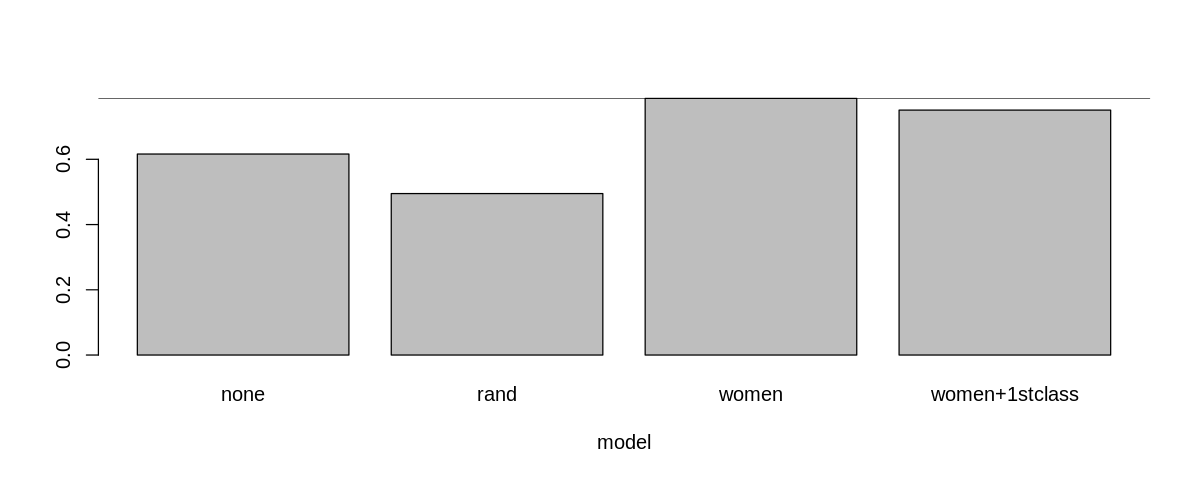

In [33]:
barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass'))
abline(h = max(scores))